In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32           # standard batch size
IMAGE_SIZE = 256          # size of image in dataset
CHANNELS=3                #RGB CHANNELS
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",     # Data directory name
    seed=123,      #
    shuffle=True,  # shuffle all the images
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [4]:
class_names=dataset.class_names # Folder names are the class name
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [5]:
len(dataset)  #showing 78 because every element in dataset is a batch of 32 images

78

In [6]:
for image_batch,label_batch in dataset.take(1): # It gives 1 batch of 32 images
    print(image_batch.shape)
    print(label_batch.numpy()) #every element we get is tensor so we need to convert it into numpy
    

(32, 256, 256, 3)
[1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1]


In [7]:
#the above output signifies(32-batch size, 256,256-image size, 3-RGB channels which are initilized above) )

In [8]:
for image_batch,label_batch in dataset.take(1): 
    print(image_batch[0]) # printing each individual image in tensor from the batch of 32 images

tf.Tensor(
[[[142. 135. 142.]
  [149. 142. 149.]
  [152. 145. 152.]
  ...
  [133. 124. 129.]
  [134. 125. 130.]
  [112. 103. 108.]]

 [[146. 139. 146.]
  [151. 144. 151.]
  [155. 148. 155.]
  ...
  [ 83.  74.  79.]
  [126. 117. 122.]
  [116. 107. 112.]]

 [[146. 139. 146.]
  [147. 140. 147.]
  [152. 145. 152.]
  ...
  [131. 122. 127.]
  [111. 102. 107.]
  [109. 100. 105.]]

 ...

 [[166. 157. 160.]
  [187. 178. 181.]
  [176. 167. 170.]
  ...
  [130. 120. 119.]
  [108.  98.  97.]
  [132. 122. 121.]]

 [[152. 143. 146.]
  [173. 164. 167.]
  [159. 150. 153.]
  ...
  [112. 102. 101.]
  [114. 104. 103.]
  [140. 130. 129.]]

 [[177. 168. 171.]
  [203. 194. 197.]
  [171. 162. 165.]
  ...
  [112. 102. 101.]
  [124. 114. 113.]
  [129. 119. 118.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch,label_batch in dataset.take(1): 
    print(image_batch[0].numpy()) #converting tensor to numpy
    #that is 3D array with every number is between 0 to 255. The color is represented by bit with 0 to 255

[[[ 99.  87.  87.]
  [157. 145. 145.]
  [ 91.  79.  79.]
  ...
  [184. 178. 182.]
  [144. 138. 142.]
  [125. 119. 123.]]

 [[116. 104. 104.]
  [120. 108. 108.]
  [132. 120. 120.]
  ...
  [132. 126. 130.]
  [203. 197. 201.]
  [158. 152. 156.]]

 [[121. 109. 109.]
  [115. 103. 103.]
  [128. 116. 116.]
  ...
  [126. 120. 124.]
  [180. 174. 178.]
  [208. 202. 206.]]

 ...

 [[166. 157. 162.]
  [197. 188. 193.]
  [163. 154. 159.]
  ...
  [208. 203. 209.]
  [181. 176. 182.]
  [189. 184. 190.]]

 [[169. 160. 165.]
  [161. 152. 157.]
  [179. 170. 175.]
  ...
  [199. 194. 200.]
  [185. 180. 186.]
  [189. 184. 190.]]

 [[158. 149. 154.]
  [163. 154. 159.]
  [129. 120. 125.]
  ...
  [189. 184. 190.]
  [192. 187. 193.]
  [192. 187. 193.]]]


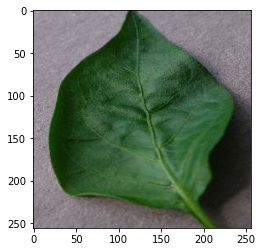

In [10]:
for image_batch,label_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype("uint8"))# imshow is matplotlib and expect 3d array in parameter so image_batch[0].numpy is used 
    # Used astype("uint8") for converting float into int
   

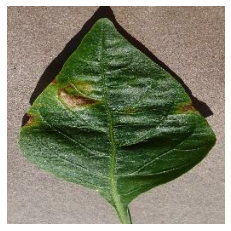

In [11]:
 for image_batch,label_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype("uint8"))# imshow is matplotlib and expect 3d array in parameter so image_batch[0].numpy is used 
    # Used astype("uint8") for converting float into int
    plt.axis("off")  # Used for hidding the axis of image
    #Every time images are shuffling so we see different images

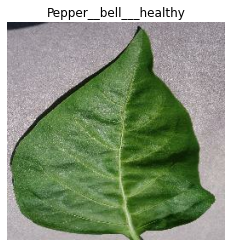

In [12]:
for image_batch,label_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype("uint8"))# imshow is matplotlib and expect 3d array in parameter so image_batch[0].numpy is used 
    # Used astype("uint8") for converting float into int
    plt.axis("off")  # Used for hidding the axis of image
    #Every time images are shuffling so we see different images
    plt.title(class_names[label_batch[0]]) # Used for displaying the label of the image that is class_name ka phle image ka naam Label_batch[0]

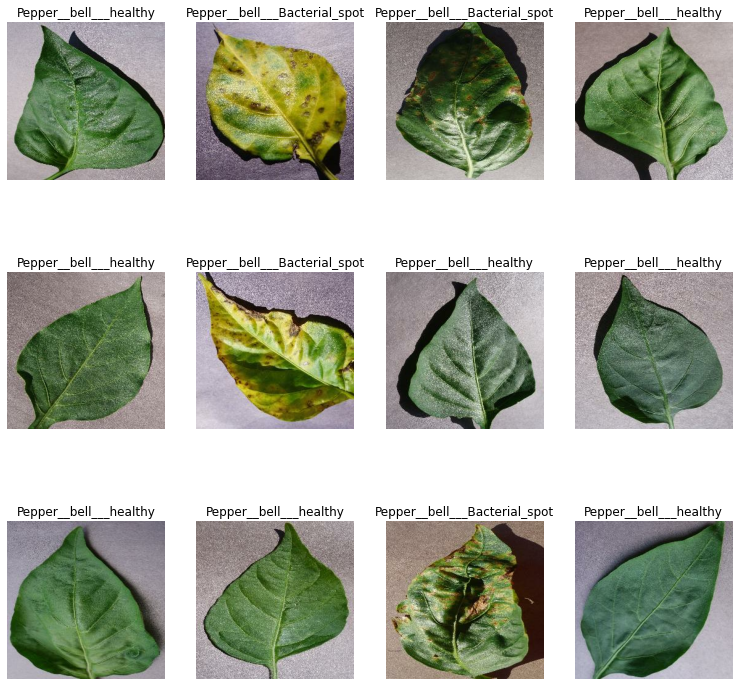

In [13]:
# Displaying first 12 images form dataset
plt.figure(figsize=(13,13))  # changing size of figure size that we will display
for image_batch,label_batch in dataset.take(1): 
    for i in range(12): # loop for displaying first 12 images
        ax=plt.subplot(3,4,i+1) # It represent the images into 3x4 matrix 
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [15]:
80% ==> Training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (2894956837.py, line 1)

In [15]:
# In sklearn we have train_test_split function for spliting the data but this can not be used in tensorflow. We use dataset.take in tensorflow
train_size = 0.8 # Because we have taken 80% data for training 
len(dataset)*train_size # 80% of our dataset is 62

62.400000000000006

In [16]:
train_ds=dataset.take(62) 
len(train_ds)

62

In [17]:
test_ds = dataset.skip(62) # skipping first 62 dataset for remaining dataset as test dataset
len(test_ds)

16

In [18]:
# Now dividing the test dataset into validation and test
val_size=0.1 # As we need 10% validation dataset
len(dataset)*val_size # Calculating the 10% of of my actual dataset 


7.800000000000001

In [19]:
# So Basically we need 7 dataset form my test dataset
val_ds = test_ds.take(7)
len(val_ds)

7

In [20]:
# Now test dataset from remaining data after remove data for validation 
test_ds=test_ds.skip(7)
len(test_ds)

9

In [21]:
# Doing Caching as it read the image from the disk and then for the next iteration when you need the same image it will kept that image in the memory.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  #
val_ds = val_ds .cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])
"""# Preprocessing part
# The numpy array was between 0 to 255, we know it is an RGB scale. We need to divide that 255 so that we get a number between 0 and 1 
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # Taking care of if during prediction if any image is not 256 by 256  
    layers.experimental.preprocessing.Rescaling(1.0/255) # Scaling  
])
# Use data augmentation to make our model robust. Let's say we train a model using some images and then when you try predicting and at that time supplying an image which is rotated or which is not which is different in a contrast then your model will not perform better so we use data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
]) """

'# Preprocessing part\n# The numpy array was between 0 to 255, we know it is an RGB scale. We need to divide that 255 so that we get a number between 0 and 1 \nresize_and_rescale=tf.keras.Sequential([\n    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # Taking care of if during prediction if any image is not 256 by 256  \n    layers.experimental.preprocessing.Rescaling(1.0/255) # Scaling  \n])\n# Use data augmentation to make our model robust. Let\'s say we train a model using some images and then when you try predicting and at that time supplying an image which is rotated or which is not which is different in a contrast then your model will not perform better so we use data augmentation \ndata_augmentation = tf.keras.Sequential([\n    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n    layers.experimental.preprocessing.RandomRotation(0.2),\n]) '

In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
""" # Building Model
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS) # creating it as a variable for reuseability
n_classes = 3  #number of classes is three which is the number of neurons.
model= models.Sequential([
    resize_and_rescale, #  First layer (We should start by scaling) 
    data_augmentation, # second layer
    layers.Conv2D(32,(3,3), activation ='relu', input_shape = input_shape),   # this is the third layer that is Convolution layer
    # Parametres of conv2d (filters that is 32(by trial and error), kernel size=(3,3),activation layer='relu'(because it is really vaery fast to compute),input_size=256,256(that is image size of our input image)  )
    # After this convolution layer we have pooling layer
    layers.MaxPooling2D((2,2)),
    # Adding more layers
    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'), # here 64 is the filters, which we can say number of neurons in the layers.
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), # flatteing the layers
    layers.Dense(64,activation='relu'), #adding a dense layer 
    layers.Dense(n_classes, activation='softmax'),   #last layer has 3 neurons and softmax function which normalize the probability of classes.
    
])
model.build(input_shape=input_shape) """

" # Building Model\ninput_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS) # creating it as a variable for reuseability\nn_classes = 3  #number of classes is three which is the number of neurons.\nmodel= models.Sequential([\n    resize_and_rescale, #  First layer (We should start by scaling) \n    data_augmentation, # second layer\n    layers.Conv2D(32,(3,3), activation ='relu', input_shape = input_shape),   # this is the third layer that is Convolution layer\n    # Parametres of conv2d (filters that is 32(by trial and error), kernel size=(3,3),activation layer='relu'(because it is really vaery fast to compute),input_size=256,256(that is image size of our input image)  )\n    # After this convolution layer we have pooling layer\n    layers.MaxPooling2D((2,2)),\n    # Adding more layers\n    layers.Conv2D(64, kernel_size =(3,3), activation ='relu'), # here 64 is the filters, which we can say number of neurons in the layers.\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, kerne

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

In [30]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 26s 1s/step - loss: 0.0144 - accuracy: 1.0000


In [31]:
scores

[0.014418943785130978, 1.0]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 62}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
type(history.history['loss'])

list

In [36]:
len(history.history['loss'])

10

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

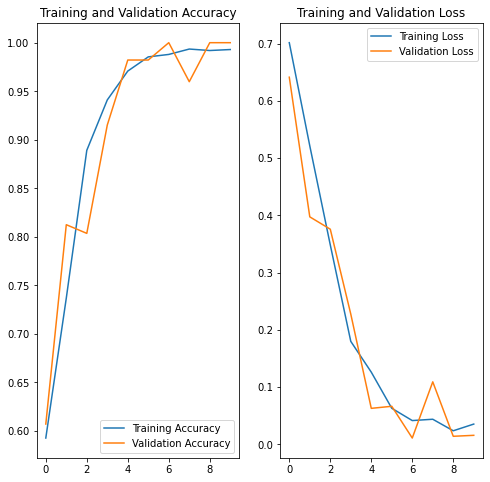

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___healthy
1/1 [==============================] - 3s 3s/step
predicted label: Pepper__bell___healthy


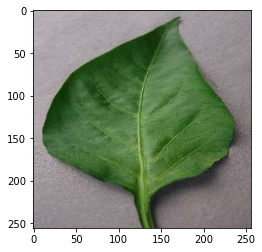

In [40]:
import numpy as np # prediction
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')# first image
    first_label = labels_batch[0].numpy() #first label
    
    print("first image to predict")
    plt.imshow(first_image) 
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 71ms/step


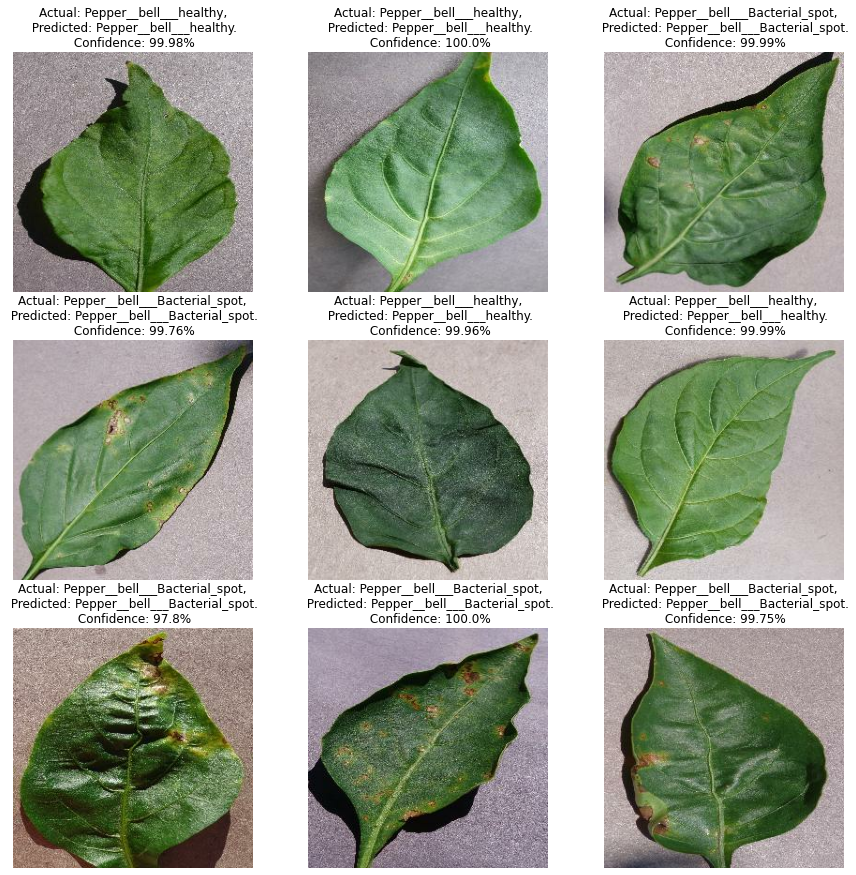

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [43]:
model_version = 1
model.save(f"../Model/{model_version}") # saving the model

INFO:tensorflow:Assets written to: ../Model/1\assets


INFO:tensorflow:Assets written to: ../Model/1\assets


In [47]:
import os
model_version=max([int(i) for i in os.listdir("../Model") + [0]])+1 # tell the value of next model version
model.save(f"../Model/{model_version}") # saving the next version

INFO:tensorflow:Assets written to: ../Model/2\assets


INFO:tensorflow:Assets written to: ../Model/2\assets
